In [19]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [20]:
DATA_FOLDER = "data/"
MODEL_FOLDER = "models/all-lr-exp/"
OUTPUT_FOLDER = "outputs/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test_X.csv"

In [21]:
# read train data
train_data = pd.read_csv(TRAIN_FILE_PATH, header=0, encoding="big5")

In [22]:
# preprocess train data
train_data[train_data=="NR"] = 0

In [23]:
train_data

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [24]:
# concat 20 days data
train_array_months = []  # 12 numpy.array, array's shape is (18, 480)
for month in range(12):
    trainDataArr = np.concatenate( [train_data[(360*month+18*day):(360*month+18*(day+1))][list(range(3, 27))].apply(pd.to_numeric).as_matrix() for day in range(20)], axis=1)
    train_array_months.append(trainDataArr)

## Train

In [25]:
w = np.random.randn(18, 9)
b = np.random.randn()

In [26]:
prev_loss = np.inf

In [27]:
# momentum
# gamma = 0.9
# vb = 0
# vw = np.zeros((18, 9))

In [28]:
lr_power = -10
lr = 1 * 10**(-10)

In [29]:
# load model
# model = np.load('models/all-momentum/los5.692615.npz')
# w = model['w']
# b = model['b']
# vb = model['vb']
# vw = model['vw']
# lr = model['lr']
# prev_loss = model['prev_loss']

In [64]:
lr_powers = list(range(0, -16, -1))
lrs = [10**power for power in lr_powers]
losses_by_lr = []

init_w = np.random.randn(18, 9)
init_b = np.random.randn()

for lr in lrs:
    print("training with lr =", lr)
    losses = []
    total_epoch = 0
    w = init_w
    b = init_b

    for epoch in range(1000):
        loss = 0
        b_grad = 0
        w_grad = np.zeros((18, 9))
        for month in range(12):
            for hour in range(470):
                x = train_array_months[month][:, hour:hour+9]
                y_data = train_array_months[month][9, hour+9]

                y_pred= einsum('ij,ij', x, w) + b
                diff = y_data - y_pred
                loss += diff * diff

                mult = 2 * diff * (-1)
                b_grad += mult
                w_grad += mult * x  # 2 * diff * (-1) * x

        loss = sqrt(loss/(12*470))
        losses.append(loss)
        
        if np.isinf(loss):
            break

        b = b - lr * b_grad
        w = w - lr * w_grad
        
        if epoch % 10 == 0:
            print(loss)
    
    losses_by_lr.append(losses)
        
#     file_name = "epo" + str(total_epoch) + "_los" + str(loss)[:6]
#     print(file_name)
#     print('  ', lr, loss)
#     np.savez(MODEL_FOLDER + file_name, b=b, w=w, vb=vb, vw=vw, lr=lr, prev_loss=prev_loss, total_epoch=total_epoch)

print('end')

training with lr = 1
386.677361074
4.33201083899e+100
training with lr = 0.1
386.677361074
4.33201078028e+90
training with lr = 0.01
386.677361074
4.33201019319e+80
training with lr = 0.001
386.677361074
4.33200432227e+70
7.2268321896e+138
training with lr = 0.0001
386.677361074
4.33194561352e+60
7.2266363101e+118
training with lr = 1e-05
386.677361074
4.33135856541e+50
7.22467779254e+98
1.20507153628e+147
training with lr = 1e-06
386.677361074
4.32549202096e+40
7.20512033054e+78
1.20018159151e+117
training with lr = 1e-07
386.677361074
4.26721867292e+30
7.01229220995e+58
1.15232533898e+87
1.89360860486e+115
3.11175449076e+143
training with lr = 1e-08
386.677361074
3.72216033386e+20
5.33531863082e+38
7.64760846904e+56
1.09620285765e+75
1.5712895214e+93
2.25227542771e+111
3.2283958705e+129
4.62756009698e+147
training with lr = 1e-09
386.677361074
8470370828.42
2.76296291412e+17
9.01255000452e+24
2.93981714951e+32
9.58943347692e+39
3.12799163116e+47
1.02032426297e+55
3.32821095565e+62
1.

## Plot

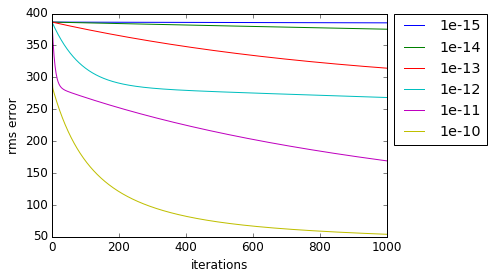

In [76]:
# log_losses_by_lr = [np.log(losses) for losses in losses_by_lr]

rcParams.update({'font.size': 12})
figure(figsize=(6, 4), dpi=240, edgecolor='k')

for i in range(15, 9, -1):
    plot(losses_by_lr[i], label=str(lrs[i]))

ylabel('rms error')
xlabel('iterations')
legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)